# DJH126 Assignment 3 - Linear Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### Open .CSV into dataframe

In [8]:
df = pd.read_csv('life_expectancy.csv')

df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1649 non-null   int64  
 1   CountryStatus                    1649 non-null   object 
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9    BMI                             1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure   

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,1423.459673,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,843.967342,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,649.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,1462.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2124.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2937.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


### Check for Outliers. If there are outliers, should we deal with them?

In [9]:
columns_to_check = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure','Hepatitis B', 'Measles ', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Outliers in {column}:\n{outliers}')

Outliers in Life expectancy :
      Unnamed: 0 CountryStatus  Life expectancy   Adult Mortality  \
50            56    Developing              48.2            375.0   
227          347    Developing              48.1            652.0   
228          348    Developing              46.4            693.0   
229          349    Developing              46.0            699.0   
230          350    Developing              46.7            679.0   
231          351    Developing              47.8            647.0   
842         1481    Developing              47.8            592.0   
843         1482    Developing              46.2            633.0   
844         1483    Developing              45.3            654.0   
845         1484    Developing              44.5            675.0   
846         1485    Developing              44.8            666.0   
847         1486    Developing              45.5            648.0   
905         1578    Developing              48.5            559.0   
906 

KeyError: 'BMI'

As we can see in the above chart, there are a large number of outliers present in the .csv file. Let's go through the box plots and see which ones we need to remove!

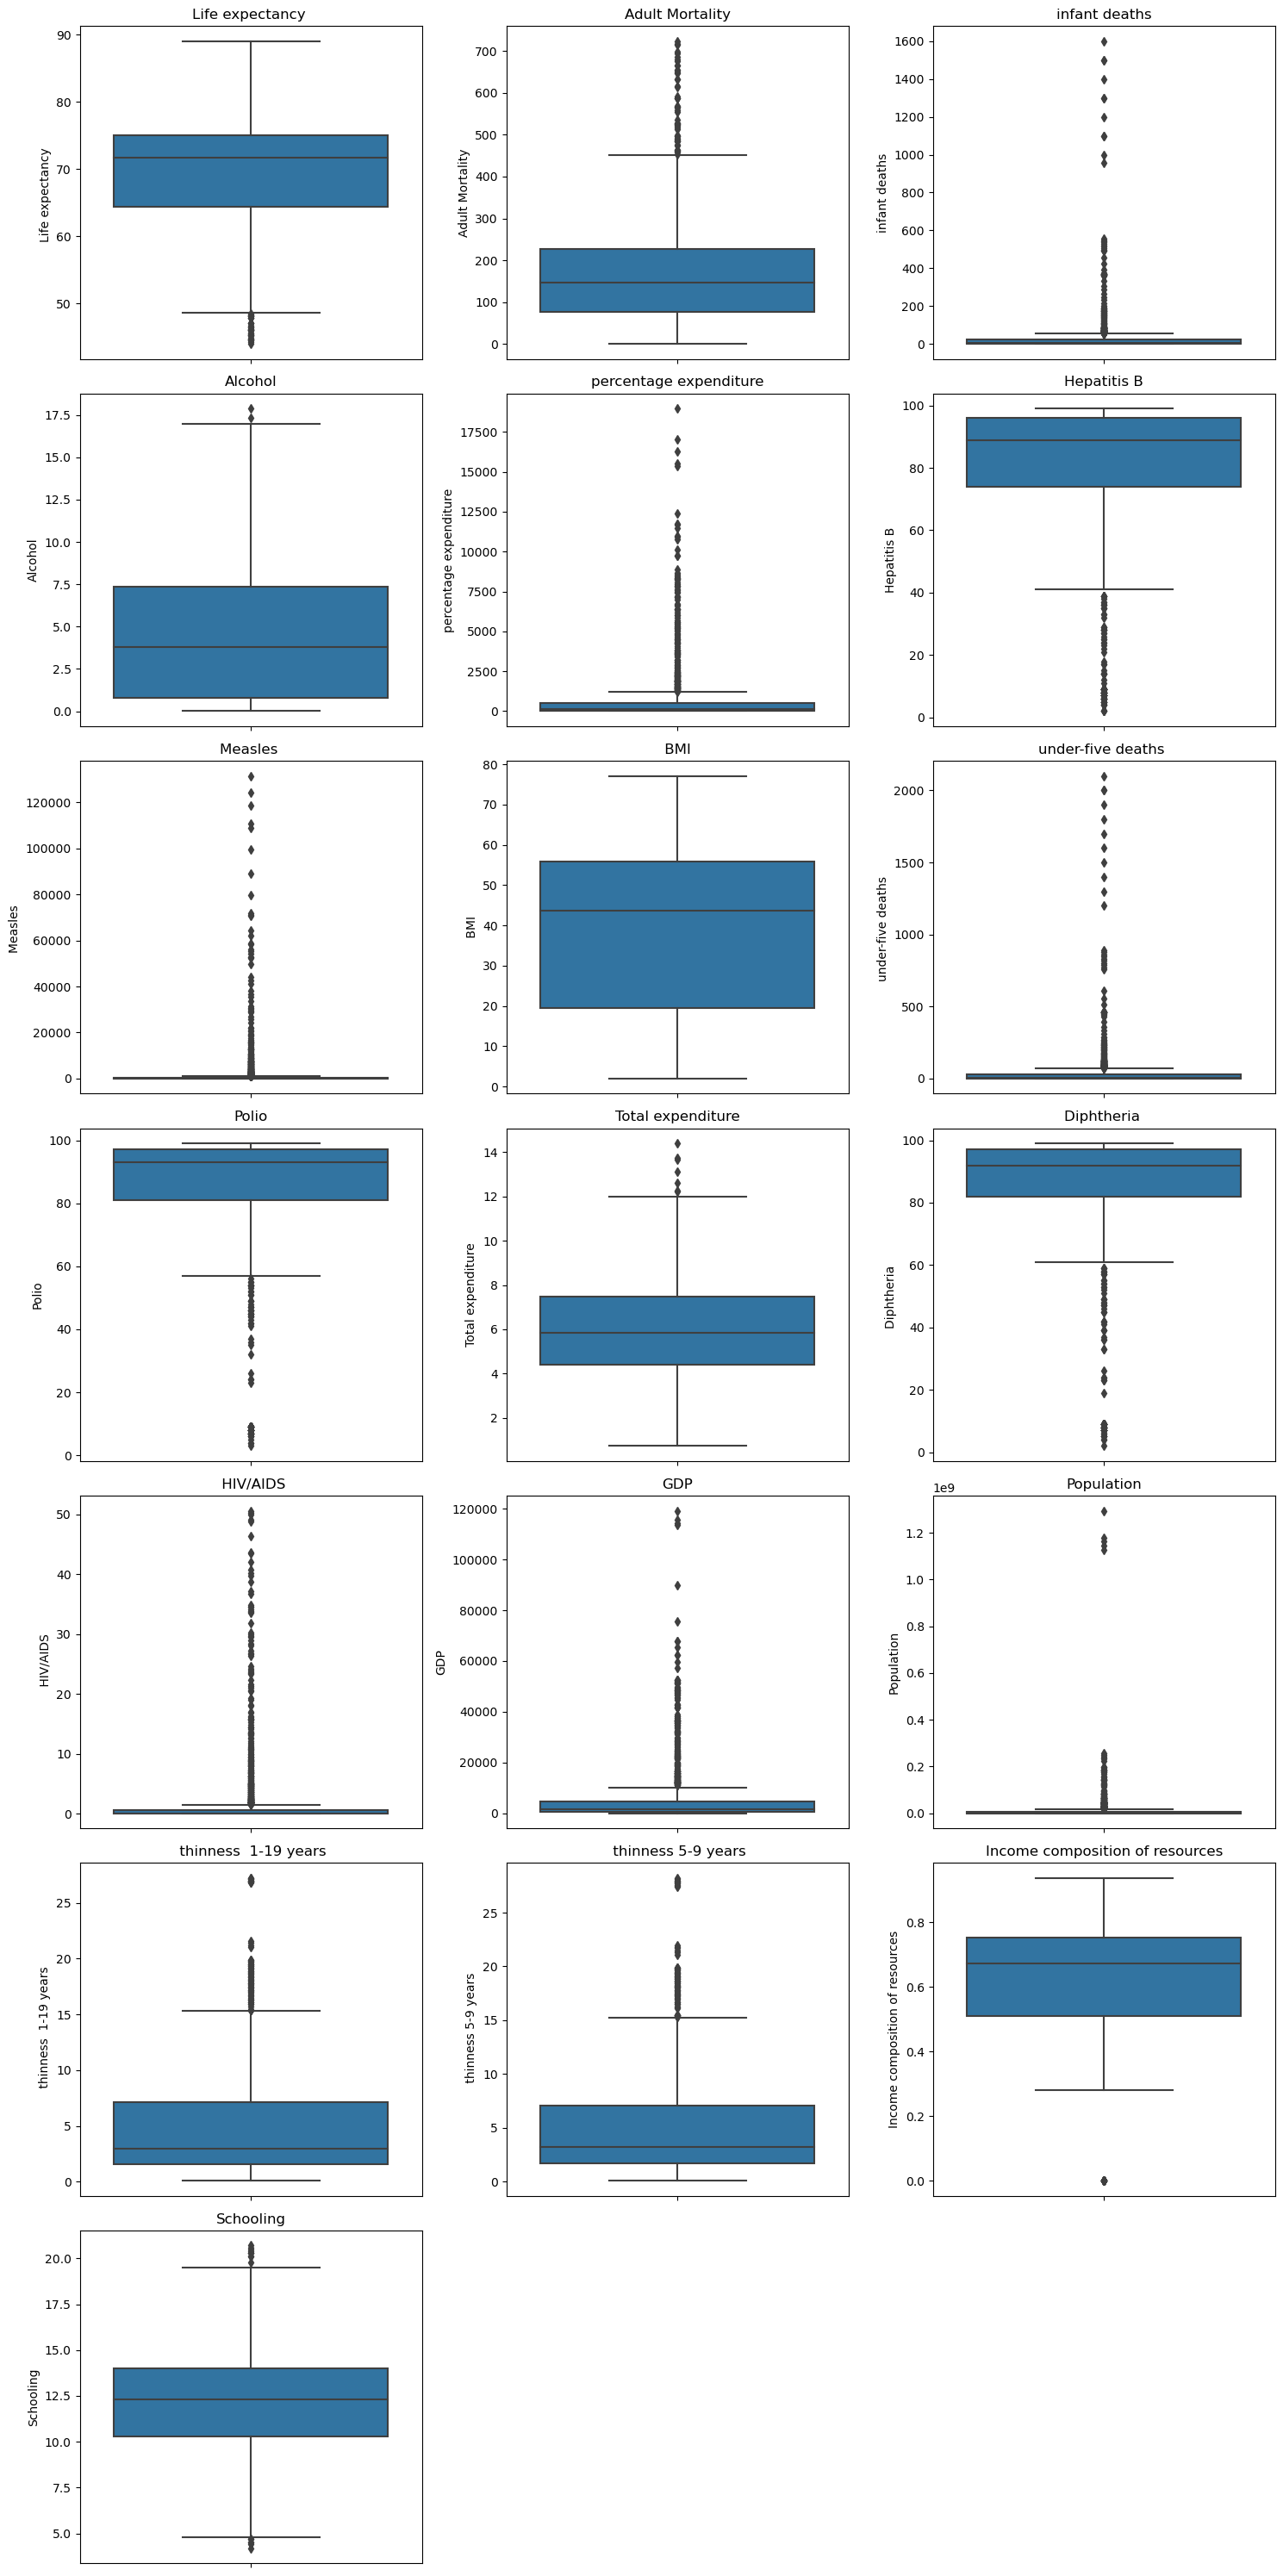

In [10]:
plt.figure(figsize=(15, 30))

continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Unnamed: 0'])
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In the above box plots, we can see that almost every single column category has outliers of some kind (excluding BMI). In looking at the variables as well as the values reported above, on the whole, they don't appear to be in error. Dropping all outliers led to a removal of 76% of the data - as such, I decided to keep them to get a better idea of the true nature of the data.

### Centering and Scaling Data - Generating a Density Plot and Standardization

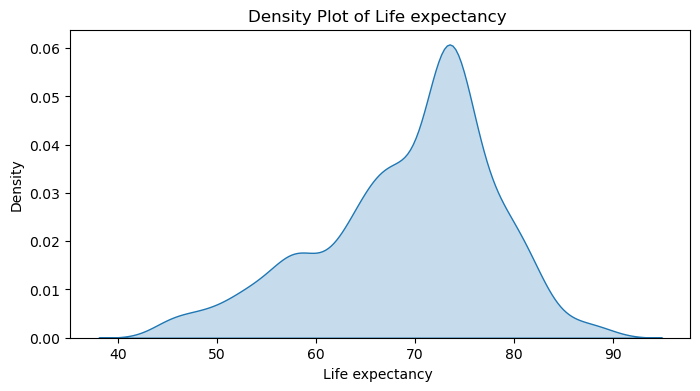

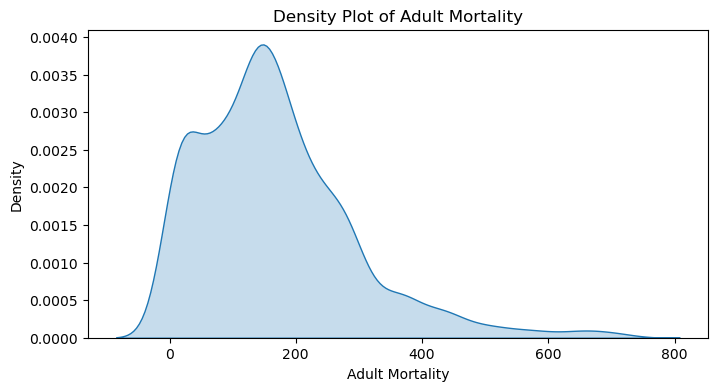

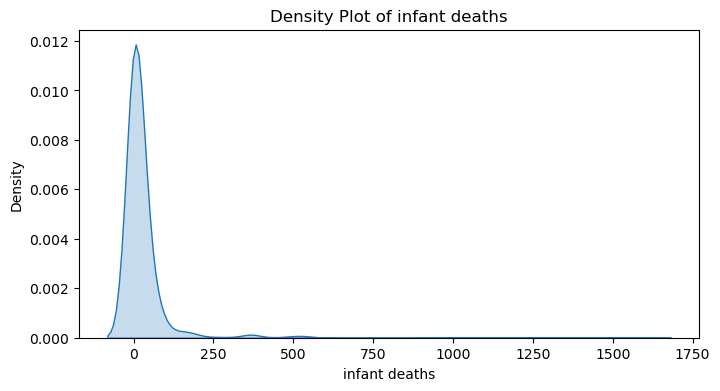

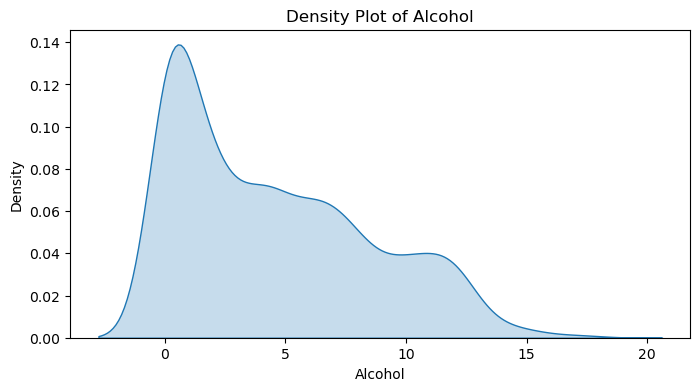

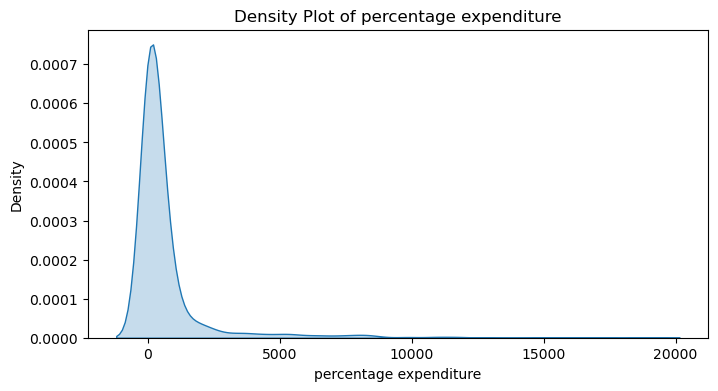

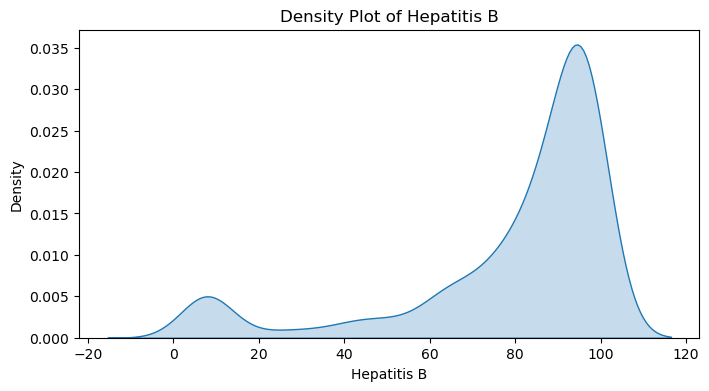

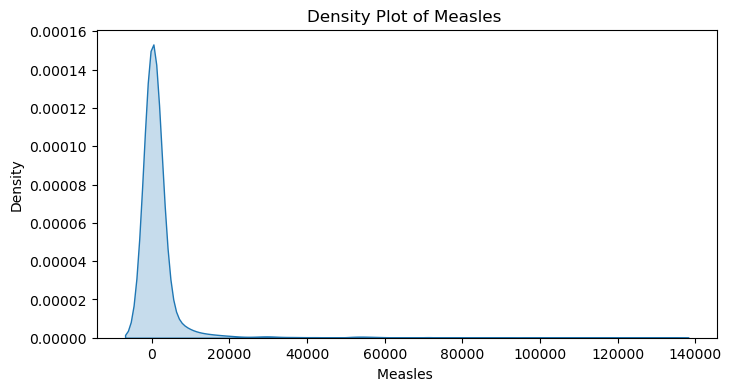

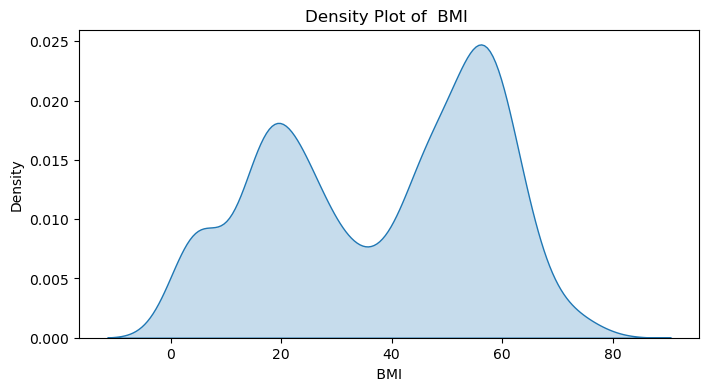

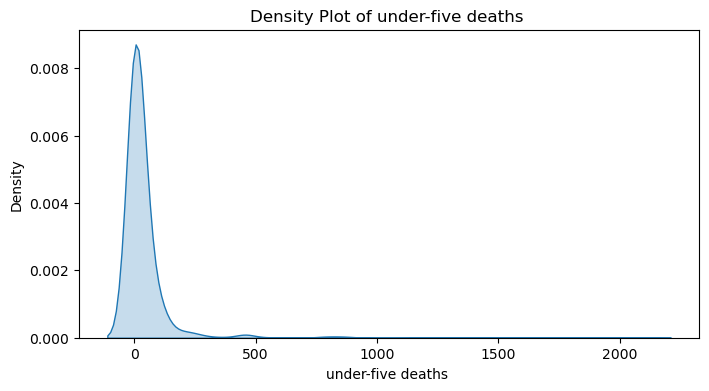

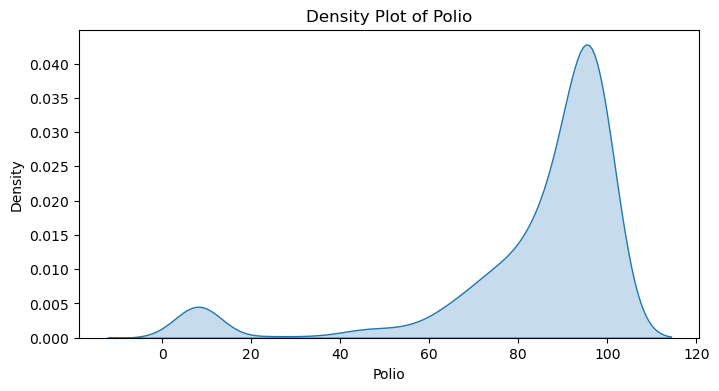

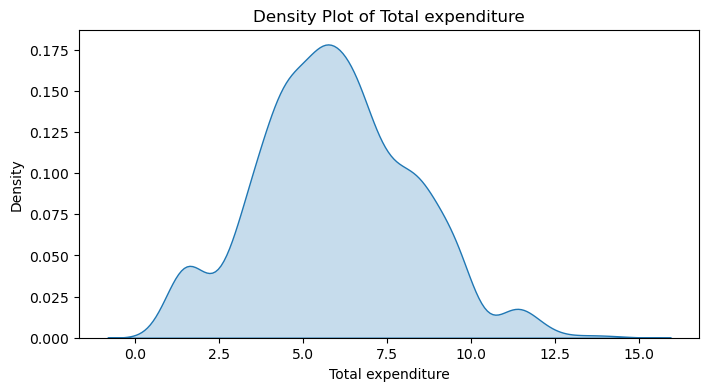

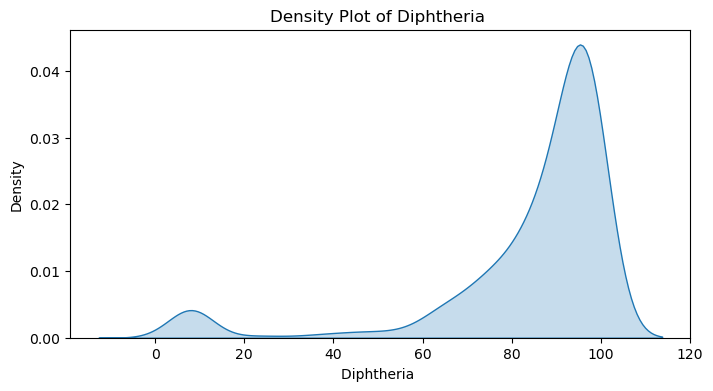

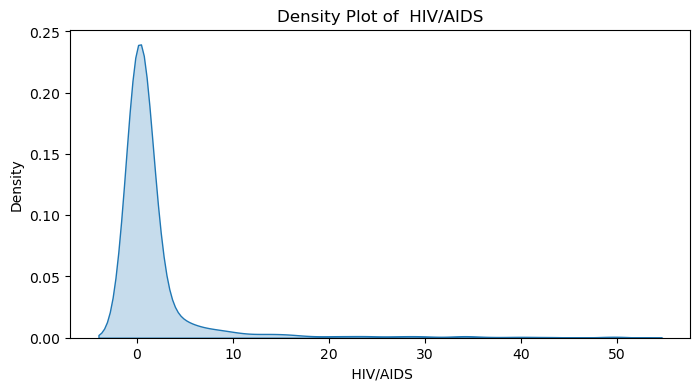

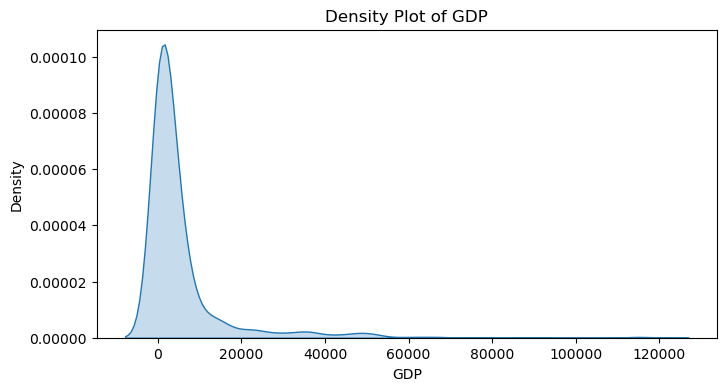

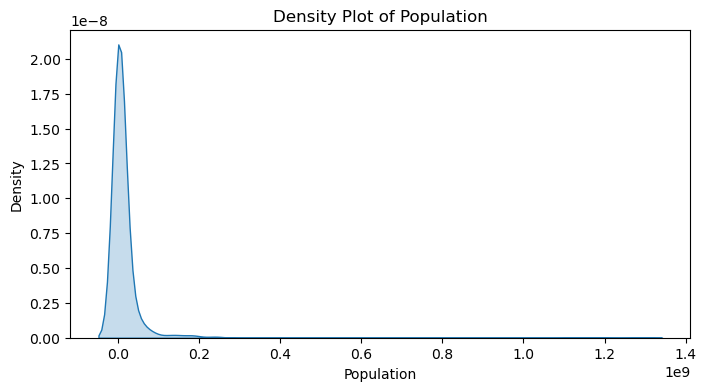

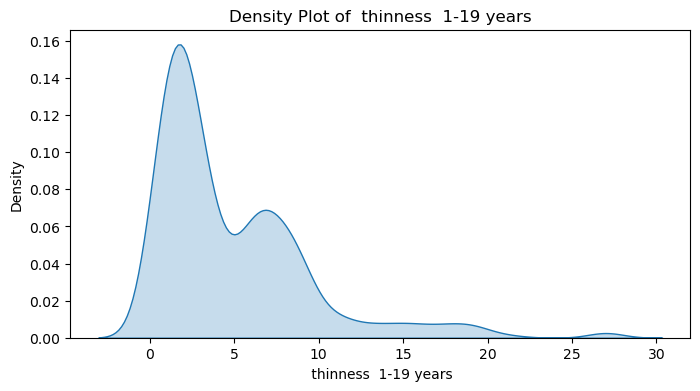

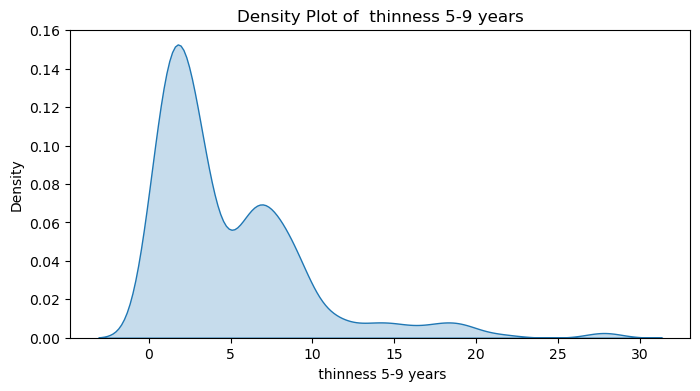

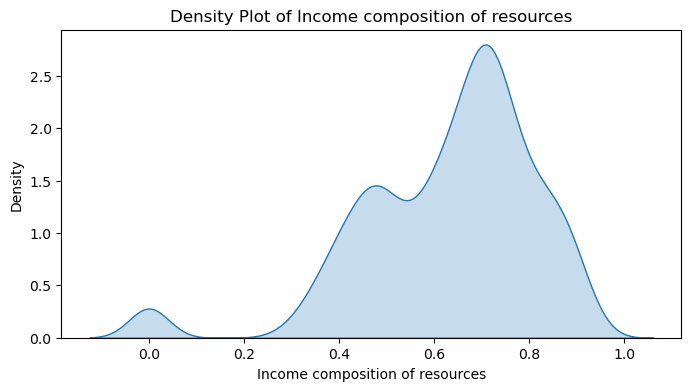

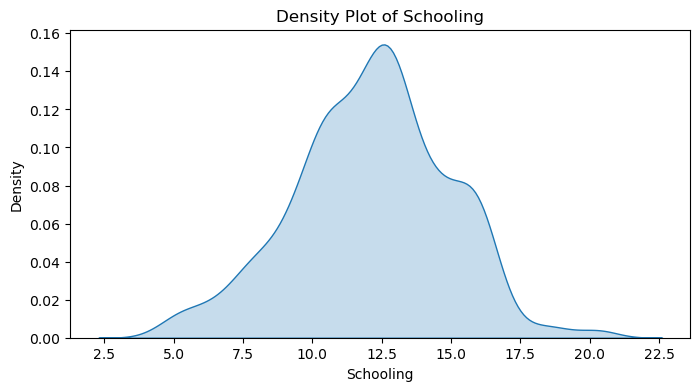

In [11]:
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Unnamed: 0'])

for column in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

As we can see from the above density plots, there is a pretty big difference between the data points - some are skewed right, some are skewed left, some are centered, and some are bimodal. Due to this, I believe it's a good idea to use a standard scaler to standardize the data for our linear regression model.

In [12]:
scaler = StandardScaler()

data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

data[continuous_columns].describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03,1.649000e+03
mean,7.239004e-16,-7.756076e-17,-4.308931e-18,6.894290e-17,2.585359e-17,1.637394e-16,-4.308931e-18,-6.894290e-17,-2.585359e-17,2.574586e-16,1.680483e-16,1.292679e-17,6.032504e-17,8.617862e-17,-3.016252e-17,5.601610e-17,-7.756076e-17,1.723572e-16,7.928433e-16
std,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00
min,-2.877169e+00,-1.334813e+00,-2.694555e-01,-1.122948e+00,-3.974386e-01,-3.016682e+00,-2.206239e-01,-1.829459e+00,-2.715414e-01,-3.589622e+00,-2.269088e+00,-3.808306e+00,-3.123886e-01,-4.850198e-01,-2.080323e-01,-1.033234e+00,-1.033406e+00,-3.450474e+00,-2.834059e+00
25%,-5.574496e-01,-7.281354e-01,-2.611781e-01,-9.243362e-01,-3.761509e-01,-2.038414e-01,-2.206239e-01,-9.433046e-01,-2.654007e-01,-1.142672e-01,-6.725248e-01,-9.990640e-02,-3.123886e-01,-4.448828e-01,-2.053085e-01,-7.069931e-01,-6.894936e-01,-6.695574e-01,-6.512310e-01
50%,2.726461e-01,-1.613706e-01,-2.446232e-01,-1.845089e-01,-3.149330e-01,3.821671e-01,-2.191362e-01,2.821199e-01,-2.469787e-01,4.204028e-01,-5.043085e-02,3.636435e-01,-3.123886e-01,-3.463489e-01,-1.878787e-01,-4.025019e-01,-3.670756e-01,2.264549e-01,6.445038e-02
75%,6.478949e-01,4.692551e-01,-8.735217e-02,6.968290e-01,-1.077978e-01,6.556377e-01,-1.836300e-01,8.948321e-01,-9.346186e-02,5.986262e-01,6.586693e-01,5.954185e-01,-2.128949e-01,-7.387447e-02,-9.930083e-02,4.892224e-01,4.712113e-01,6.526070e-01,6.727795e-01
max,2.239859e+00,4.428626e+00,1.297442e+01,3.311051e+00,1.038404e+01,7.728394e-01,1.281561e+01,1.973408e+00,1.262387e+01,6.877378e-01,3.669082e+00,6.881285e-01,8.061668e+00,9.902593e+00,1.816047e+01,4.860846e+00,5.006558e+00,1.663353e+00,3.070312e+00


### Transformation

In [13]:
features_to_transform = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', 'under-five deaths ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years']

for feature in features_to_transform:
    df[f'sqrt_{feature}'] = np.sqrt(df[feature])

Additionally, given the number of right-skewed Density Plots above, I believe it's important to transform the graphs using square root transformation, as right-skewed datasets can have negative effects on linear regression models. Doing so helps normalize the data. 

### Checking Linear Regression Assumptions

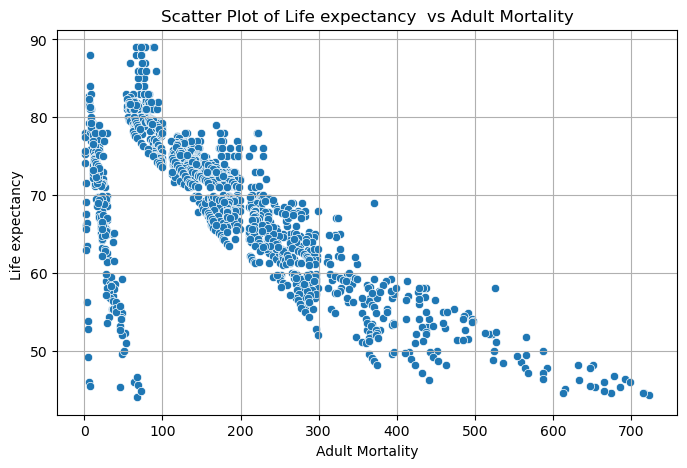

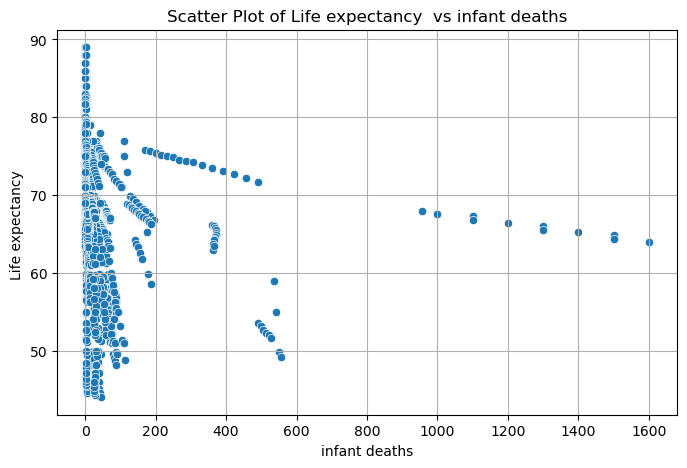

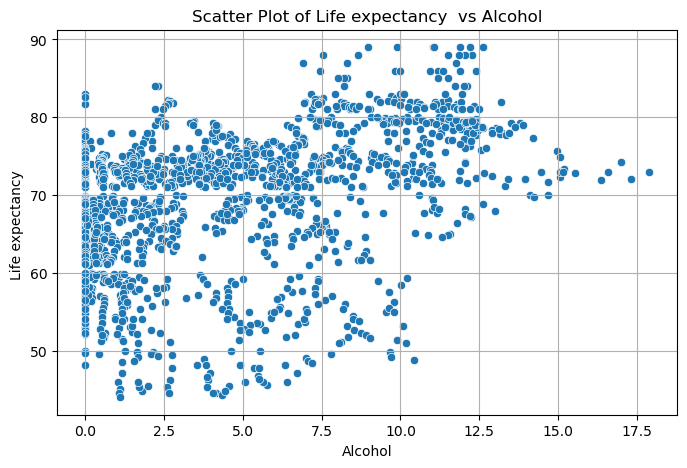

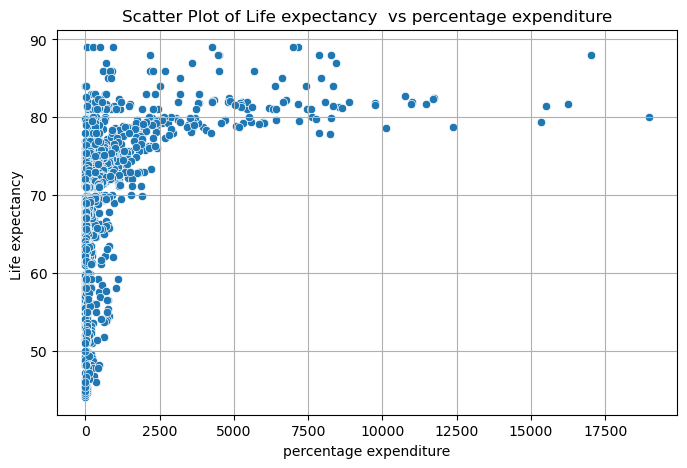

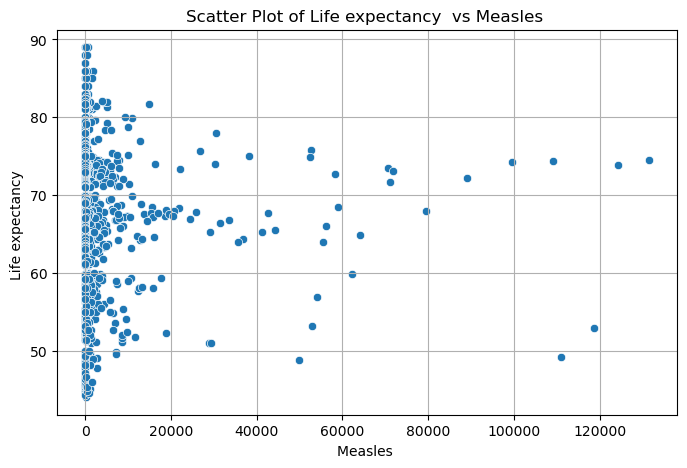

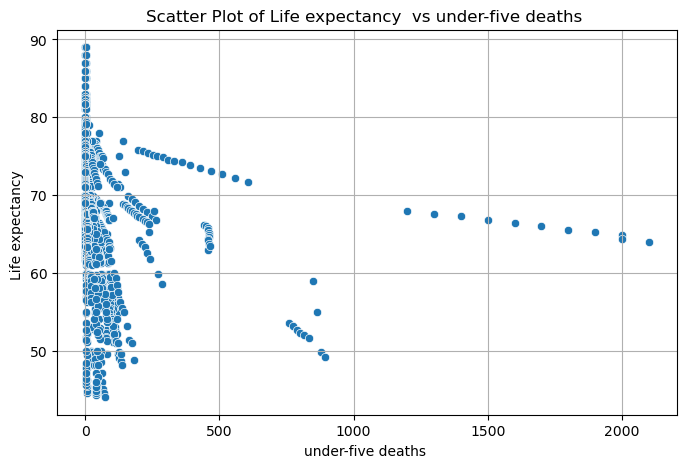

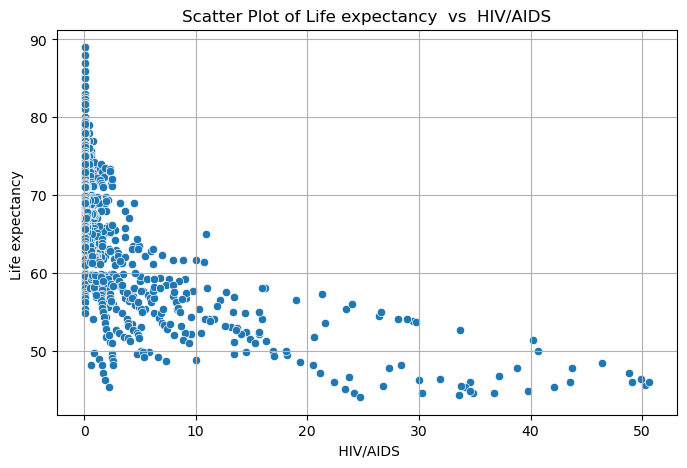

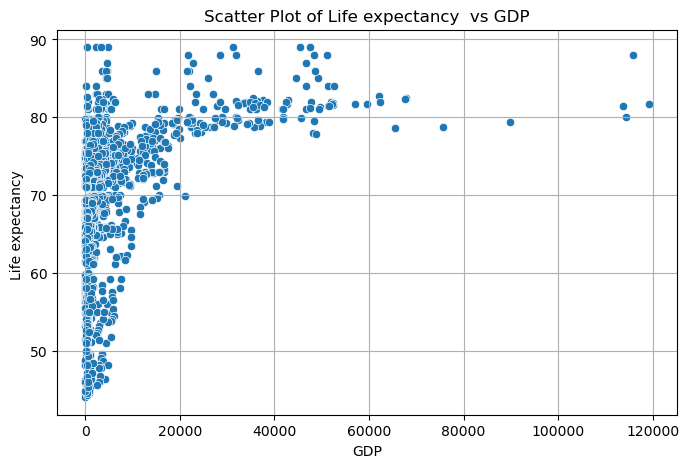

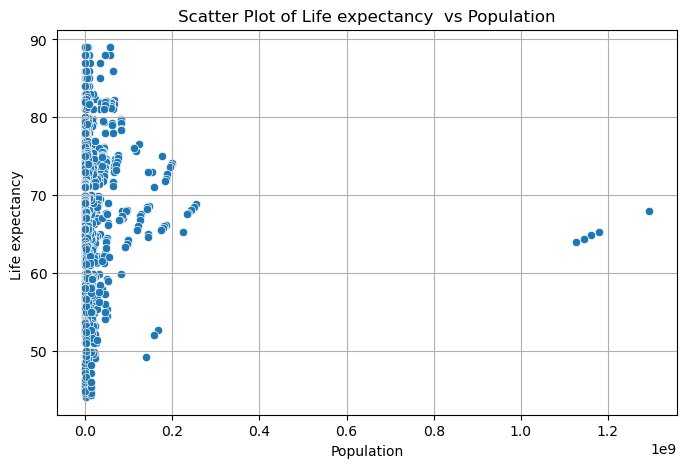

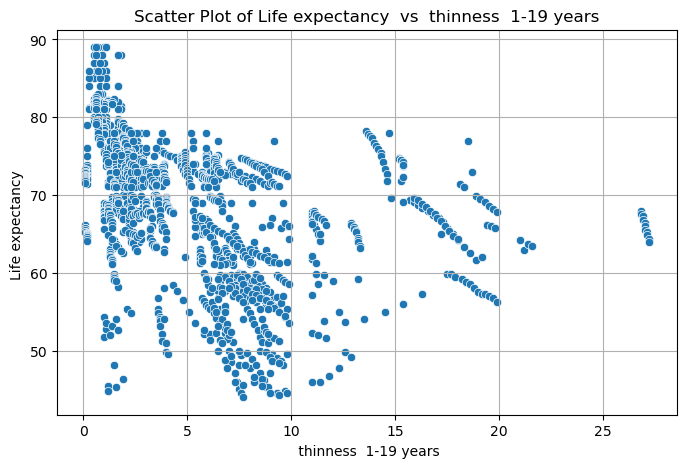

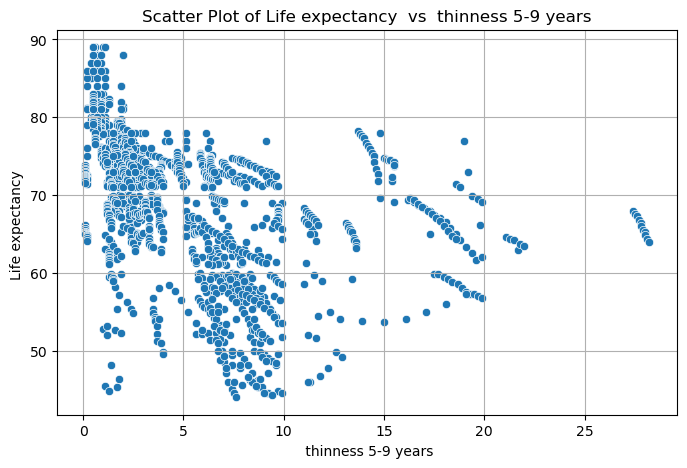

In [14]:
response_variable = 'Life expectancy '

for feature in features_to_transform:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df[response_variable])
    plt.title(f'Scatter Plot of {response_variable} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(response_variable)
    plt.grid()
    plt.show()


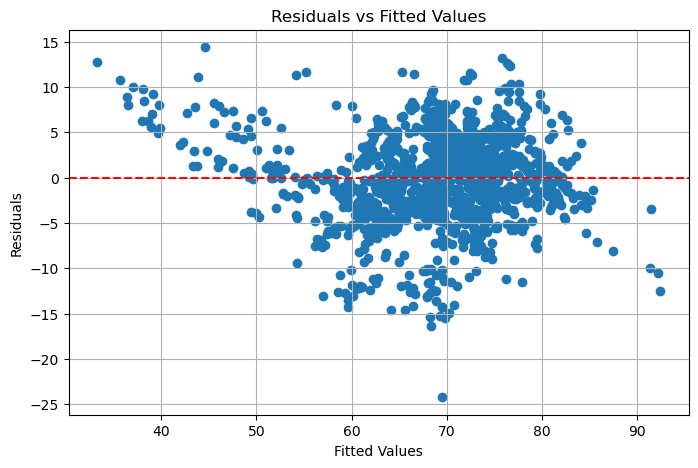

In [15]:
X = df[features_to_transform]
y = df[response_variable]
model = sm.OLS(y, sm.add_constant(X)).fit()

plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

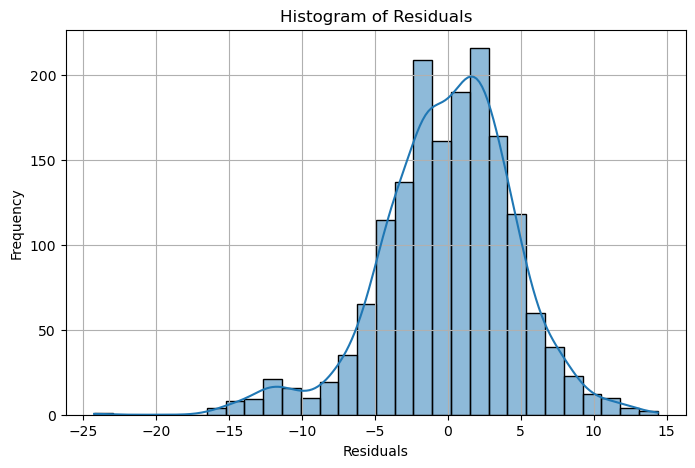

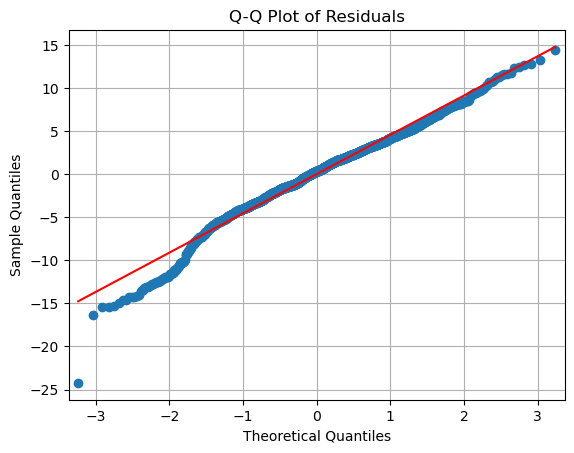

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(model.resid, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

Alcohol is the least linear.

### Setting Up Dummy Variables

In [17]:
df_with_dummies = pd.get_dummies(df, columns=['CountryStatus'], drop_first=True)

print(df_with_dummies.head())

   Unnamed: 0  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0           0              65.0            263.0             62     0.01   
1           1              59.9            271.0             64     0.01   
2           2              59.9            268.0             66     0.01   
3           3              59.5            272.0             69     0.01   
4           4              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  sqrt_Alcohol  sqrt_percentage expenditure  sqrt_Measles   \


## Building Linear Regression Model

In [18]:
from sklearn.model_selection import train_test_split

feature_columns = df_with_dummies.columns.drop(['Life expectancy ', 'Unnamed: 0'])

target_variable = 'Life expectancy '

X = df_with_dummies[feature_columns]
y = df_with_dummies[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 1319
Testing set size: 330


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-3.57129361e-02  1.88055968e-02 -7.31514102e-01 -1.33310825e-03
 -8.57277534e-03  4.08097772e-05  1.76566667e-03 -1.02570329e-02
  1.63247338e-03  3.99839129e-02  1.49970599e-02  1.55566139e-01
  1.76009600e-04 -8.09231585e-09 -4.83663875e-01  8.21562782e-01
  8.48081075e+00  5.77418124e-01  5.71515332e-01  1.39538381e+00
  2.53950883e+00  1.73998159e-01 -6.68989298e-03 -1.44764311e+00
 -3.38933579e+00 -4.24293184e-02  1.79567690e-04  2.70305649e+00
 -4.68132274e+00 -1.50810509e+00]
Intercept: 59.63720339091555


In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r_squared)

RMSE: 3.0681303007887717
R-squared: 0.867458543426297


These above scores for RMSE and R-squared are very positive. The RMSE score indicates that on average the model is off by about 2.92 years of life expentency, which, given the data set, makes sense! There's a lot of variance in the data set, and given the range of life expentency, this is a relatively small error. The R-squared, on the other hand, is a decent value. It indicates that the model is representative of 88% of the variance in the data set, which is wanted for a regression model.

### Building Three Models

In [27]:
model1_predictors = ['Adult Mortality',' BMI ', 'GDP', 'Schooling']
model2_predictors = ['infant deaths', 'percentage expenditure', 'Hepatitis B', 'Population']
model3_predictors = X_train.columns #same as the above linear regression model

#function to train and evaluate model
def evaluate_model(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    y_pred = model.predict(X_test_subset)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    
    return rmse, r_squared

#evaluate each model
model1_rmse, model1_r2 = evaluate_model(model1_predictors)
model2_rmse, model2_r2 = evaluate_model(model2_predictors)
model3_rmse, model3_r2 = evaluate_model(model3_predictors)

print("Model 1 - RMSE:", model1_rmse, "R-squared:", model1_r2)
print("Model 2 - RMSE:", model2_rmse, "R-squared:", model2_r2)
print("Model 3 - RMSE:", model3_rmse, "R-squared:", model3_r2)


Model 1 - RMSE: 4.4424642204553555 R-squared: 0.7221233741089848
Model 2 - RMSE: 7.529180881258171 R-squared: 0.20182227984816614
Model 3 - RMSE: 3.0681303007887717 R-squared: 0.867458543426297


### Is the "best" model good?

Model 3 is objectively the best model out of the above three models. The RMSE is roughly 3.07 and the R-squared value is roughly 0.87 - meaning that the model is deviating from the actual lifespan values by about 3 years, and it's including about 87% of the variance, which is far and by the best of the generated models. Model 1 and Model 2, on the other hand, were both well of their balance. Model 1 had an okay RMSE of 4.44, which, while a little higher than Model 3, is still believeable, while Model 2 had an RMSE of 7.53, which is a bit less believable. On the other hand, Model 1 had an R-squared of 0.72 which is a bit low, while Model 2 had an R-squared of just 0.2, which means a significant part of the variance was being removed. It's definitely not perfect - but I am willing to say it's good.